# Workshop 8. Backward Propagation
## 1. Review of forward propagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.array([0.3,0.7]).reshape(1,-1)
weight_1 = np.array([[0.5,0.2,0.4],[-0.3,-0.3,0.6]])
weight_2 = np.array([0.5,-0.6,0.8])

z_1 = data@weight_1
h=(1/(1+np.exp(-z_1)))

z_2 = h@weight_2
output = (1/(1+np.exp(-z_2)))

output

array([0.61548081])

## 2. Backward Propagation
### 2.1 Perceptron
Perceptron is a single layer neural network and a multi-layer perceptron is called Neural Networks. Perceptron is a linear classifier (binary)

#### Loss function
$$
\begin{aligned}
&J(\theta)=-\frac{1}{m}\left[\sum_{i=1}^m y^i \log h_\theta\left(x^i\right)+\left(1-y^i\right) \log \left(1-h_\theta\left(x^i\right)\right)\right]
\end{aligned}
$$

In [4]:
data = np.array([[1,0,0,0],#0
                 [1,0,0,1],#0
                 [1,1,0,0],#0
                 [1,0,1,0],#0
                 [1,1,1,0],#1
                 [1,0,1,1],#1
                 [1,1,0,1],#1
                 [1,1,1,1]])#1

y = np.array([0,0,0,0,1,1,1,1])

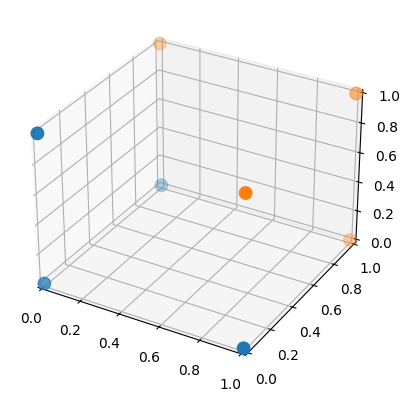

In [8]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

ax.scatter(data[:4,1],data[:4,2],data[:4,3],s=80)
ax.scatter(data[4:,1],data[4:,2],data[4:,3],s=80)

#### 2.1.1 Without activation function

#### Loss function
$$
\begin{aligned}
&f(\theta)=-\frac{1}{m}\left[\sum_{i=1}^m y^i \log h_\theta\left(x^i\right)+\left(1-y^i\right) \log \left(1-h_\theta\left(x^i\right)\right)\right]
\end{aligned}
$$

$$
\begin{aligned}
f(z)'=\frac{1-y}{1-z} - \frac{y}{z}
\end{aligned}
$$



In [17]:
theta = np.array([2.0,2.0,1.0,1.0])
y = np.array([0,0,0,0,1,1,1,1])
alpha = 0.001
epoch = 200

for itr in range(epoch):
    z = data@theta #forward propagation
    theta -= alpha*(((1-y)/(1-z)-y/z))@data
z = data@theta
z

array([2.53621939, 3.73283537, 4.69976572, 3.73283537, 5.89638169,
       4.92945134, 5.89638169, 7.09299767])

#### 2.1.2 Sigmoid activation function:
$$
f(z)=\frac{1}{1+e^{-z}}=\frac{e^{z}}{1+e^{z}}
$$

$$
f(z)'= f(z)(1-f(z))
$$

In [20]:
theta = np.array([1.0,2.0,2.0,1.0])
y = np.array([0,0,0,0,1,1,1,1])
alpha = 0.005
epoch = 6000

for itr in range(epoch):
    z = data@theta #forward propagation
    f = 1/(1+np.exp(-z))
    f_d = f*(1-f)

    theta -= alpha*(((1-y)/(1-f)-y/f)*f_d)@data

z = data@theta
f = 1/(1+np.exp(-z))
f

array([0.0015736 , 0.11473618, 0.11475776, 0.11475776, 0.91425539,
       0.91423874, 0.91423874, 0.99886081])

#### 2.1.3 Tanh activation function:
$$
f(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}
$$

$$
f(z)'= 1-f(z)^2
$$

In [24]:
theta = np.array([1.0,2.0,2.0,1.0])
y = np.array([0,0,0,0,1,1,1,1])
alpha = 0.005
epoch = 6000

for itr in range(epoch):
    z = data@theta #forward propagation
    f = (np.exp(z)-np.exp(-z))/((np.exp(z)+np.exp(-z)))
    f_d = (1-f**2)

    theta -= alpha*(((1-y)/(1-f)-y/f)*f_d)@data

z = data@theta
f = (np.exp(z)-np.exp(-z))/((np.exp(z)+np.exp(-z)))
f

array([-0.99997172, -0.93438109, -0.93438109, -0.93438109,  0.97572063,
        0.97572063,  0.97572063,  0.99998975])

### 2.2 Neural Network

#### Error of output layer
\begin{equation}
\delta^{(2)} = a^{(2)} - y
\end{equation}

#### Error of hidden layer
\begin{equation}
\delta^{(1)} = (W^{(2)})^T \cdot \delta^{(2)} \odot g'(a^{(1)})
\end{equation}

#### Gradient Descent Update

\begin{equation}
W^{(1)} = W^{(1)} - \alpha \frac{1}{m} \delta^{(1)}X^T
\end{equation}

\begin{equation}
W^{(2)} = W^{(2)} - \alpha \frac{1}{m} \delta^{(2)}(a^{(1)})^T
\end{equation}

In [3]:
data_2D = np.array([[1,0,0],#0
                    [1,1,0],#1
                    [1,0,1],#1
                    [1,1,1]])#0

#### Exercise. Could you use back propagation to optimize the classification of the following data and compute the accuracy of the predicted result?

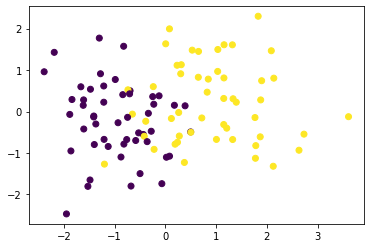

In [4]:
from sklearn.datasets import make_classification

x, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1,random_state=2043)
X = np.concatenate((np.ones((x.shape[0],1)), x),axis=1)
theta = np.ones((X.shape[1],1))

plt.scatter(x[:,0], x[:,1], c=y)